# Análise Exploratória de Dados - carros_usados.csv

Este notebook responde às perguntas solicitadas sobre o dataset `carros_usados.csv`, cobrindo análises de vendas, preços, tendências, impacto de características, outliers e estratégias de marketing.

## Estrutura das Análises
1. Vendas e Estoques
2. Preço e Custos
3. Tendências por Categoria
4. Impacto de Características no Desempenho
5. Identificação de Outliers e Anomalias
6. Estratégias de Marketing e Logística

In [1]:
# 📦 Imports iniciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway

# Configurações de visualização
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 🔍 Carregando os dados
df = pd.read_csv('carros_usados.csv', sep=';')

# 📄 Visualizando as 5 primeiras linhas
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


## 1. Vendas e Estoques

1.1 Tempo médio no lote: 76.45 dias

1.2 Tempo médio de venda por tipo de veículo:
vehicle.type
LUXURY           61.976459
FAMILY.SMALL     73.287356
FAMILY.LARGE     74.015385
FAMILY.MEDIUM    80.699403
ECONOMY          85.266598
Name: lot.sale.days, dtype: float64


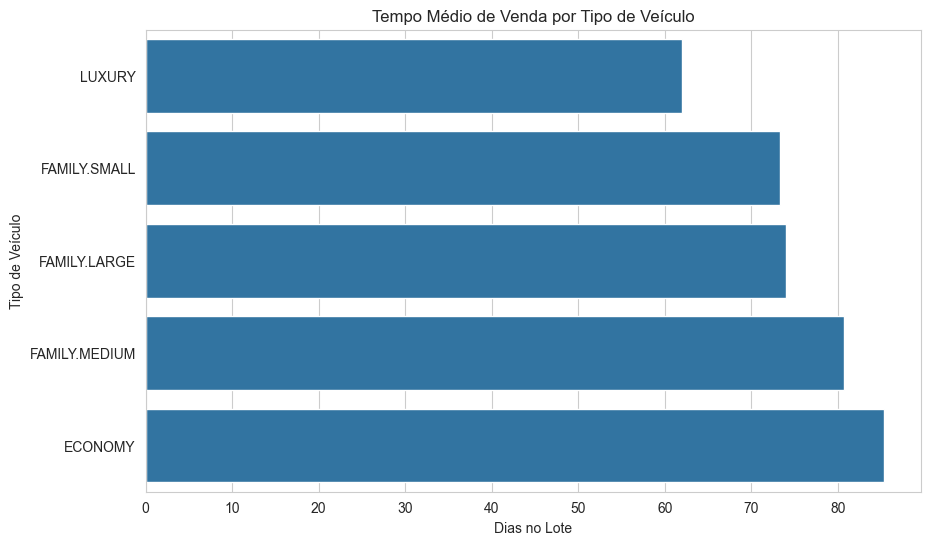


1.3 Correlação entre mileage e lot.sale.days: 0.06


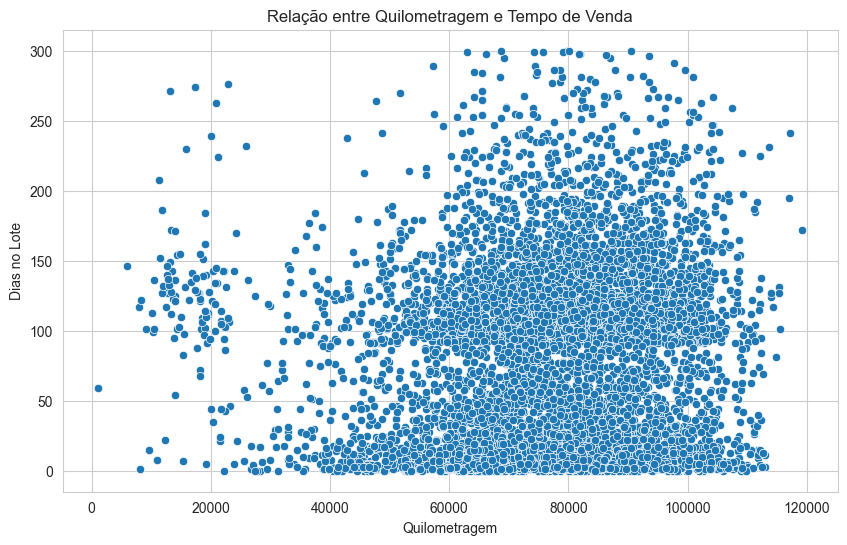


1.4 Correlação entre vehicle.age e total.cost: -0.31


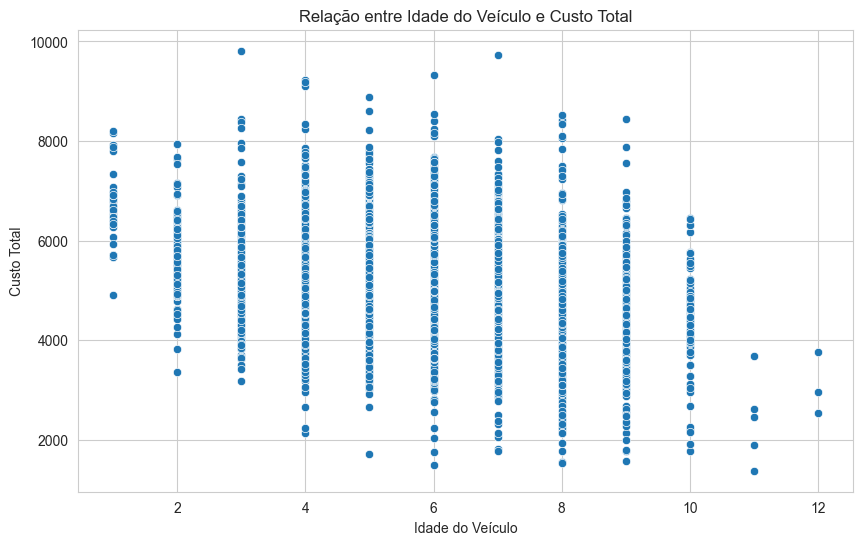

In [2]:
# 1.1 Tempo médio em dias no lote (lot.sale.days)
mean_sale_days = df['lot.sale.days'].mean()
print(f'1.1 Tempo médio no lote: {mean_sale_days:.2f} dias')

# 1.2 Tipo de veículo com menor tempo de venda
mean_sale_days_by_type = df.groupby('vehicle.type')['lot.sale.days'].mean().sort_values()
print('\n1.2 Tempo médio de venda por tipo de veículo:')
print(mean_sale_days_by_type)

# Visualização
sns.barplot(x=mean_sale_days_by_type.values, y=mean_sale_days_by_type.index)
plt.title('Tempo Médio de Venda por Tipo de Veículo')
plt.xlabel('Dias no Lote')
plt.ylabel('Tipo de Veículo')
plt.show()

# 1.3 Influência da quilometragem (mileage) no tempo de venda (lot.sale.days)
correlation_mileage_sale = df[['mileage', 'lot.sale.days']].corr().iloc[0, 1]
print(f'\n1.3 Correlação entre mileage e lot.sale.days: {correlation_mileage_sale:.2f}')

# Visualização com scatter plot
sns.scatterplot(x='mileage', y='lot.sale.days', data=df)
plt.title('Relação entre Quilometragem e Tempo de Venda')
plt.xlabel('Quilometragem')
plt.ylabel('Dias no Lote')
plt.show()

# 1.4 Correlação entre idade do veículo (vehicle.age) e custo total (total.cost)
correlation_age_cost = df[['vehicle.age', 'total.cost']].corr().iloc[0, 1]
print(f'\n1.4 Correlação entre vehicle.age e total.cost: {correlation_age_cost:.2f}')

# Visualização
sns.scatterplot(x='vehicle.age', y='total.cost', data=df)
plt.title('Relação entre Idade do Veículo e Custo Total')
plt.xlabel('Idade do Veículo')
plt.ylabel('Custo Total')
plt.show()

## 2. Preço e Custos

2.1 Preço médio por estado:
state
NM    4691.565022
FL    4821.242279
VA    4881.094903
AZ    4931.399261
CA    5064.960861
TX    5065.806061
NV    5092.811245
GA    5123.230874
Name: total.cost, dtype: float64


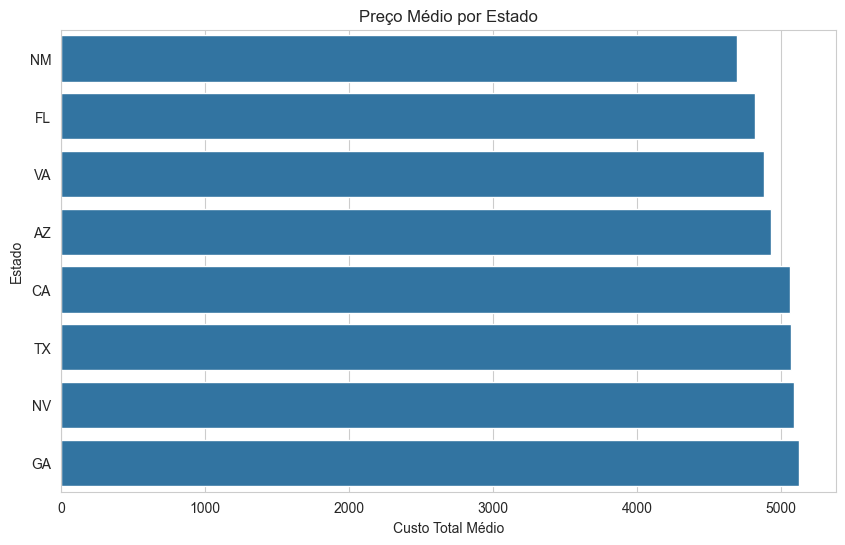


2.2 Preço médio por tipo (Importado vs Doméstico):
domestic.import
Domestic    4932.471854
Import      5088.144105
Name: total.cost, dtype: float64


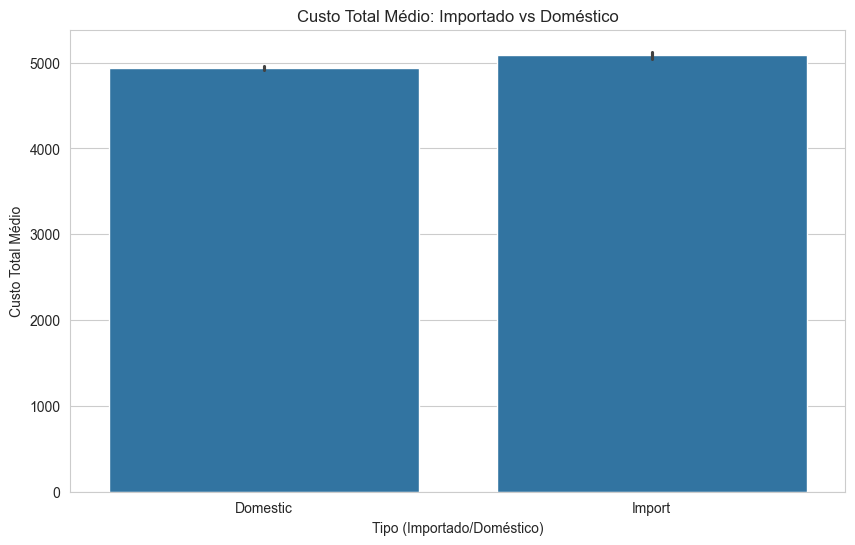


2.3 Preço médio por cor:
color.set
BLUE      4864.032958
RED       4885.327362
WHITE     4919.996255
PURPLE    4976.824969
SILVER    4991.600555
GREEN     5064.397624
GOLD      5105.725291
BLACK     5140.317697
Name: total.cost, dtype: float64
P-valor do teste ANOVA para cores: 0.0000


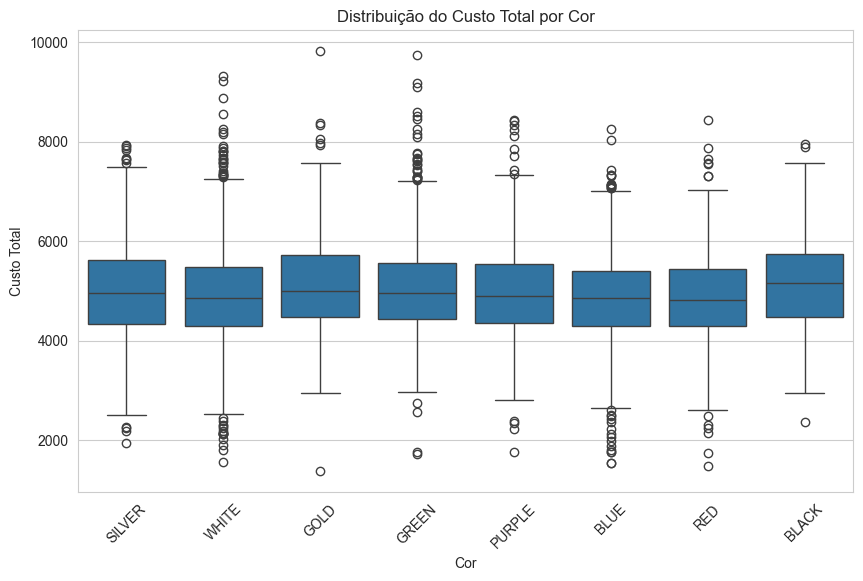


2.4 Custo total por grupo de idade e tipo de veículo:
vehicle.type           ECONOMY  FAMILY.LARGE  FAMILY.MEDIUM  FAMILY.SMALL  \
vehicle.age.group                                                           
FIVE               4783.896266   5288.790698    5058.116466   5010.970109   
FOUR               4770.440141   5435.982143    5263.133621   5065.265101   
ONE-THREE          5047.341176   5719.028986    5744.308605   5363.056180   
SEVEN+             3912.953846   4754.028958    4534.567201   4408.502392   
SIX                4449.676259   5165.222642    4914.842748   4744.063492   

vehicle.type            LUXURY  
vehicle.age.group               
FIVE               5428.604520  
FOUR               5468.047170  
ONE-THREE          5986.500000  
SEVEN+             5000.040268  
SIX                5230.450644  


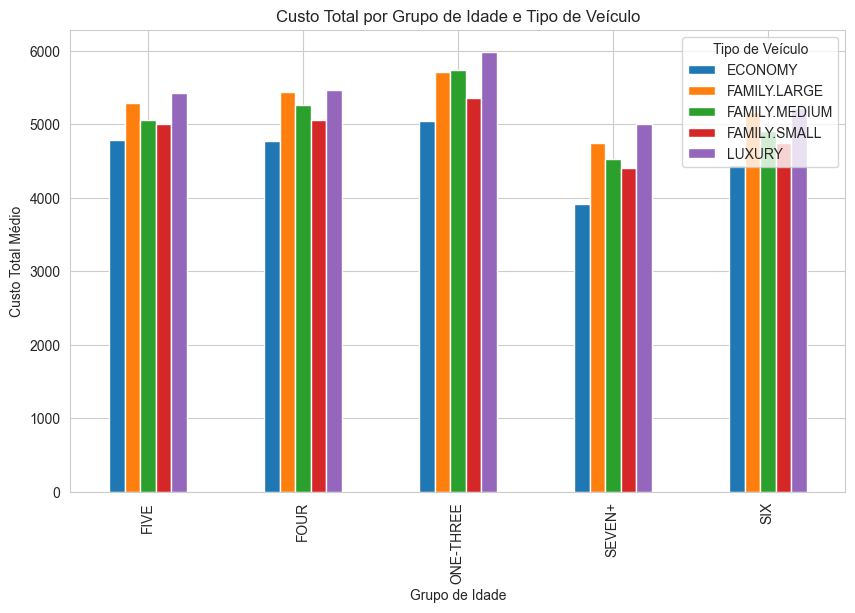

In [3]:
# 2.1 Preço médio por estado
mean_price_by_state = df.groupby('state')['total.cost'].mean().sort_values()
print('2.1 Preço médio por estado:')
print(mean_price_by_state)

# Visualização
sns.barplot(x=mean_price_by_state.values, y=mean_price_by_state.index)
plt.title('Preço Médio por Estado')
plt.xlabel('Custo Total Médio')
plt.ylabel('Estado')
plt.show()

# 2.2 Comparação entre veículos importados e domésticos
mean_price_by_import = df.groupby('domestic.import')['total.cost'].mean()
print('\n2.2 Preço médio por tipo (Importado vs Doméstico):')
print(mean_price_by_import)

# Visualização
sns.barplot(x='domestic.import', y='total.cost', data=df)
plt.title('Custo Total Médio: Importado vs Doméstico')
plt.xlabel('Tipo (Importado/Doméstico)')
plt.ylabel('Custo Total Médio')
plt.show()

# 2.3 Diferença no custo total por cor
mean_price_by_color = df.groupby('color.set')['total.cost'].mean().sort_values()
print('\n2.3 Preço médio por cor:')
print(mean_price_by_color)

# Teste ANOVA para verificar significância
groups = [df[df['color.set'] == color]['total.cost'] for color in df['color.set'].unique()]
anova_result = f_oneway(*groups)
print(f'P-valor do teste ANOVA para cores: {anova_result.pvalue:.4f}')

# Visualização
sns.boxplot(x='color.set', y='total.cost', data=df)
plt.title('Distribuição do Custo Total por Cor')
plt.xlabel('Cor')
plt.ylabel('Custo Total')
plt.xticks(rotation=45)
plt.show()

# 2.4 Variação do custo total por grupo de idade e tipo de veículo
mean_price_by_age_type = df.groupby(['vehicle.age.group', 'vehicle.type'])['total.cost'].mean().unstack()
print('\n2.4 Custo total por grupo de idade e tipo de veículo:')
print(mean_price_by_age_type)

# Visualização
mean_price_by_age_type.plot(kind='bar')
plt.title('Custo Total por Grupo de Idade e Tipo de Veículo')
plt.xlabel('Grupo de Idade')
plt.ylabel('Custo Total Médio')
plt.legend(title='Tipo de Veículo')
plt.show()

## 3. Tendências por Categoria

3.1 Marcas e modelos mais vendidos por estado:
    state       makex                  make.model  count
13     AZ   CHEVROLET            CHEVROLET.LUMINA     66
51     AZ      NISSAN               NISSAN.SENTRA     65
30     AZ        FORD                 FORD.TAURUS     52
126    CA      NISSAN               NISSAN.SENTRA    138
148    CA      TOYOTA              TOYOTA.COROLLA     78
105    CA        FORD                 FORD.TAURUS     77
197    FL      NISSAN               NISSAN.SENTRA    103
162    FL   CHEVROLET            CHEVROLET.LUMINA     79
151    FL       BUICK               BUICK.LESABRE     66
232    GA   CHEVROLET            CHEVROLET.LUMINA     68
223    GA       BUICK               BUICK.LESABRE     44
274    GA  OLDSMOBILE  OLDSMOBILE.CUTLASS SUPREME     43
294    NM   CHEVROLET           CHEVROLET.CORSICA     11
295    NM   CHEVROLET            CHEVROLET.LUMINA     11
308    NM        FORD                 FORD.TAURUS     11
370    NV         KIA                  KI

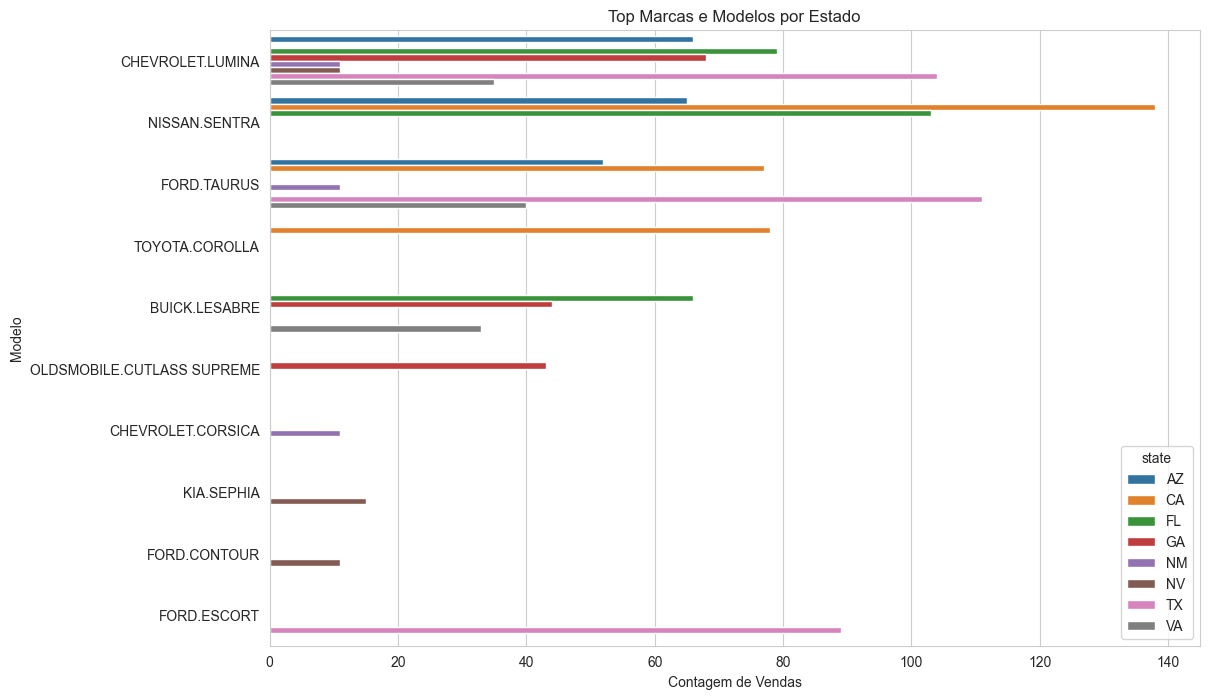


3.2 Faixas etárias mais comuns:
vehicle.age.group
SEVEN+       2115
FIVE         1748
SIX          1544
FOUR         1320
ONE-THREE     768
Name: count, dtype: int64


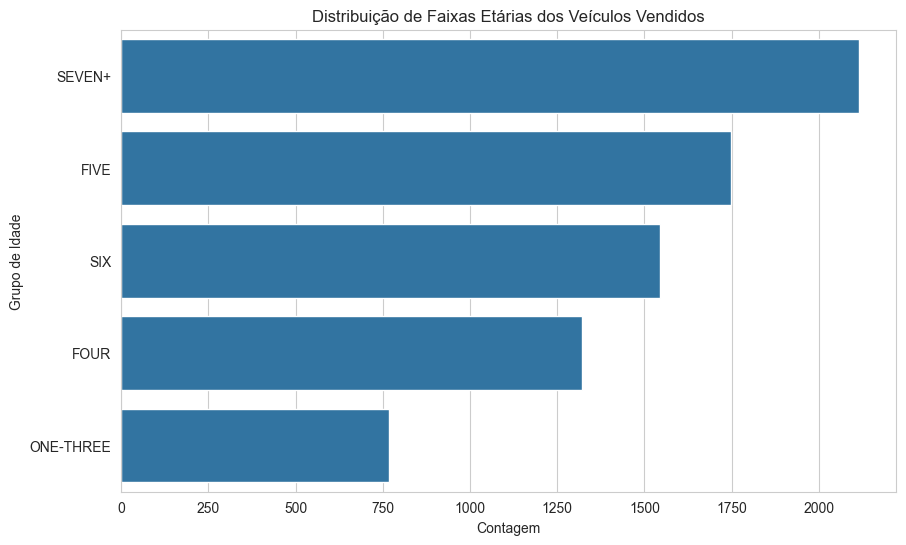


3.3 Nota: Necessária uma coluna de data para análise sazonal.
3.4 Nota: Necessária uma coluna de data para análise sazonal por idade.


In [4]:
# 3.1 Marcas e modelos mais vendidos por estado
top_make_model_by_state = df.groupby(['state', 'makex', 'make.model']).size().reset_index(name='count')
top_make_model_by_state = top_make_model_by_state.sort_values(['state', 'count'], ascending=[True, False])
top_make_model_by_state = top_make_model_by_state.groupby('state').head(3)  # Top 3 por estado
print('3.1 Marcas e modelos mais vendidos por estado:')
print(top_make_model_by_state)

# Visualização
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='make.model', hue='state', data=top_make_model_by_state)
plt.title('Top Marcas e Modelos por Estado')
plt.xlabel('Contagem de Vendas')
plt.ylabel('Modelo')
plt.show()

# 3.2 Faixas etárias mais comuns
age_group_counts = df['vehicle.age.group'].value_counts()
print('\n3.2 Faixas etárias mais comuns:')
print(age_group_counts)

# Visualização
sns.barplot(x=age_group_counts.values, y=age_group_counts.index)
plt.title('Distribuição de Faixas Etárias dos Veículos Vendidos')
plt.xlabel('Contagem')
plt.ylabel('Grupo de Idade')
plt.show()

# 3.3 Tendência sazonal nos lot.sale.days
# Nota: O dataset não contém uma coluna de data explícita. Supondo que 'data.set' ou outra coluna contenha informações temporais, 
# extrairemos o mês (se disponível) ou indicaremos a necessidade de uma coluna de data.
# Exemplo hipotético com uma coluna de data
# df['date'] = pd.to_datetime(df['some_date_column'])  # Substituir por coluna real
# df['month'] = df['date'].dt.month
# mean_sale_days_by_month = df.groupby('month')['lot.sale.days'].mean()
# print('\n3.3 Tempo médio de venda por mês:')
# print(mean_sale_days_by_month)

# Visualização
# sns.lineplot(x=mean_sale_days_by_month.index, y=mean_sale_days_by_month.values)
# plt.title('Tempo Médio de Venda por Mês')
# plt.xlabel('Mês')
# plt.ylabel('Dias no Lote')
# plt.show()
print('\n3.3 Nota: Necessária uma coluna de data para análise sazonal.')

# 3.4 Venda de veículos mais antigos por período
# Similar à 3.3, requer uma coluna de data
# print('\n3.4 Nota: Necessária uma coluna de data para análise de vendas por período para veículos antigos.')
print('3.4 Nota: Necessária uma coluna de data para análise sazonal por idade.')

## 4. Impacto de Características no Desempenho

4.1 Correlação mileage vs total.cost para FAMILY.LARGE: -0.18
4.1 Correlação mileage vs total.cost para FAMILY.MEDIUM: -0.26
4.1 Correlação mileage vs total.cost para ECONOMY: -0.17
4.1 Correlação mileage vs total.cost para FAMILY.SMALL: -0.05
4.1 Correlação mileage vs total.cost para LUXURY: -0.04

4.2 Importância das características para o custo total:
vehicle.type         105.896547
domestic.import       31.911031
vehicle.age.group     18.418009
mileage                0.000470
vehicle.age         -183.335739
dtype: float64


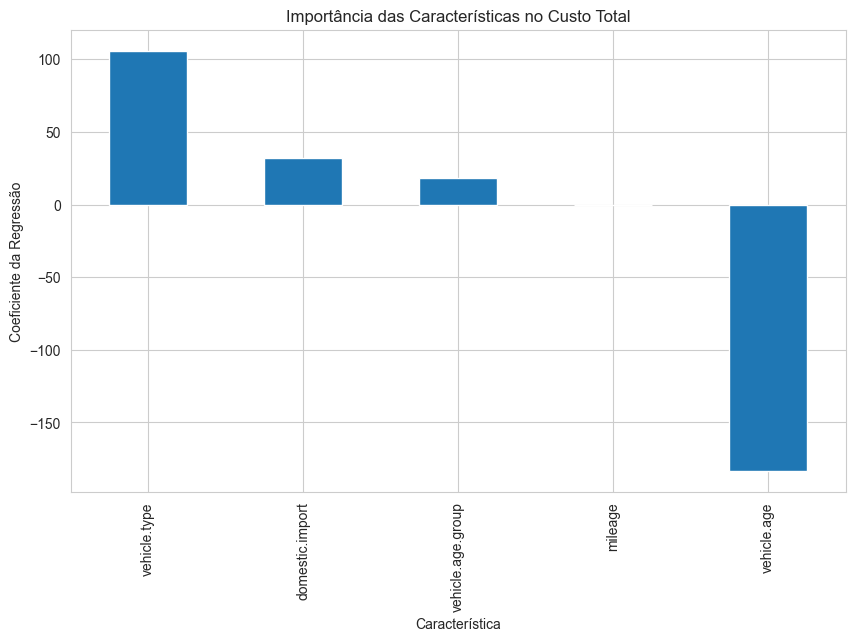

In [5]:
# 4.1 Impacto da quilometragem no custo total por tipo de veículo
fig = px.scatter(df, x='mileage', y='total.cost', color='vehicle.type', 
                 title='Impacto da Quilometragem no Custo Total por Tipo de Veículo')
fig.show()

# Correlação por tipo de veículo
for vehicle_type in df['vehicle.type'].unique():
    subset = df[df['vehicle.type'] == vehicle_type]
    corr = subset[['mileage', 'total.cost']].corr().iloc[0, 1]
    print(f'4.1 Correlação mileage vs total.cost para {vehicle_type}: {corr:.2f}')

# 4.2 Características que mais influenciam o custo total
# Usando uma regressão linear simples para avaliar importância
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Codificando variáveis categóricas
df_encoded = df.copy()
for col in ['vehicle.type', 'vehicle.age.group', 'domestic.import']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Regressão
X = df_encoded[['vehicle.type', 'vehicle.age.group', 'domestic.import', 'mileage', 'vehicle.age']]
y = df_encoded['total.cost']
model = LinearRegression().fit(X, y)
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print('\n4.2 Importância das características para o custo total:')
print(feature_importance)

# Visualização
feature_importance.plot(kind='bar')
plt.title('Importância das Características no Custo Total')
plt.xlabel('Característica')
plt.ylabel('Coeficiente da Regressão')
plt.show()

## 5. Identificação de Outliers e Anomalias

5.1 Veículos com tempo de venda acima da média + 2 desvios padrão:
              make.model   vehicle.type  vehicle.age  mileage  lot.sale.days
5     CHEVROLET.CAVALIER        ECONOMY            7    82771            218
26    PONTIAC.BONNEVILLE   FAMILY.LARGE            5   105294            242
37         MAZDA.PROTEGE        ECONOMY            6    74550            283
38      CHEVROLET.LUMINA  FAMILY.MEDIUM            3    80435            227
39         BUICK.CENTURY  FAMILY.MEDIUM            8    64197            229
...                  ...            ...          ...      ...            ...
3443    OLDSMOBILE.CIERA  FAMILY.MEDIUM            8    89142            209
3450       MAZDA.PROTEGE   FAMILY.SMALL            7   101969            231
3451         FORD.TAURUS  FAMILY.MEDIUM            6    74000            255
3457         BUICK.REGAL  FAMILY.MEDIUM            7    85517            224
3463       OLDSMOBILE.88   FAMILY.LARGE            8    81554            229

[279 row

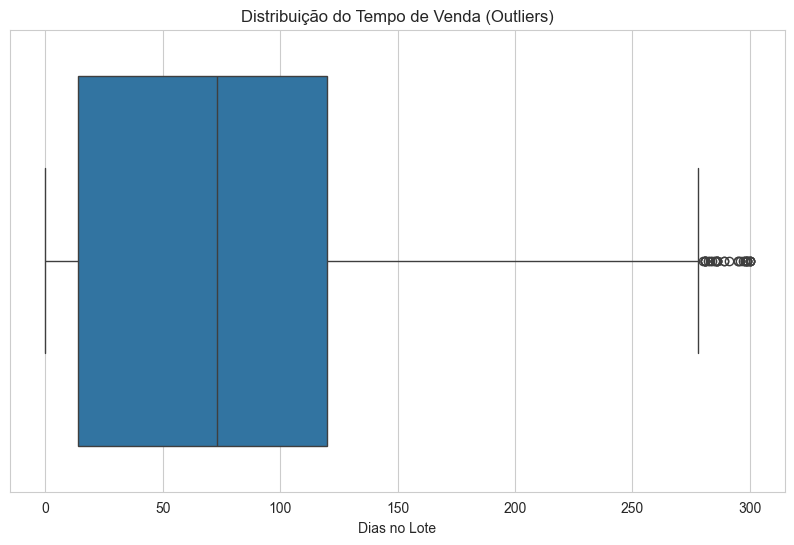


5.2 Veículos com custo total acima da média + 2 desvios padrão:
     state       makex                 make.model  total.cost
1       AZ       DODGE                 DODGE.NEON        6886
6       NV  MITSUBISHI          MITSUBISHI.GALANT        7578
26      AZ     PONTIAC         PONTIAC.BONNEVILLE        7561
33      GA       BUICK                BUICK.REGAL        7344
38      TX   CHEVROLET           CHEVROLET.LUMINA        7959
...    ...         ...                        ...         ...
7242    TX     PONTIAC            PONTIAC.SUNFIRE        8261
7403    TX   CHEVROLET         CHEVROLET.CAVALIER        7318
7434    CA       DODGE             DODGE.INTREPID        7721
7450    TX   CHEVROLET  CHEVROLET.CAPRICE CLASSIC        7571
7453    NV     PONTIAC         PONTIAC.GRAND PRIX        6971

[223 rows x 4 columns]


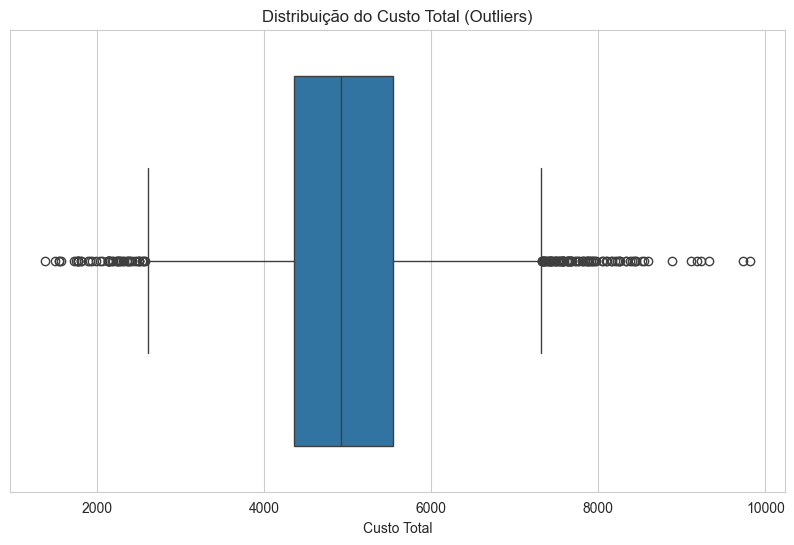

In [6]:
# 5.1 Veículos com tempo de venda muito acima da média
mean_sale_days = df['lot.sale.days'].mean()
std_sale_days = df['lot.sale.days'].std()
outliers_sale_days = df[df['lot.sale.days'] > mean_sale_days + 2 * std_sale_days]
print('5.1 Veículos com tempo de venda acima da média + 2 desvios padrão:')
print(outliers_sale_days[['make.model', 'vehicle.type', 'vehicle.age', 'mileage', 'lot.sale.days']])

# Visualização
sns.boxplot(x='lot.sale.days', data=df)
plt.title('Distribuição do Tempo de Venda (Outliers)')
plt.xlabel('Dias no Lote')
plt.show()

# 5.2 Estados ou marcas com preços significativamente fora da média
mean_cost = df['total.cost'].mean()
std_cost = df['total.cost'].std()
outliers_cost = df[df['total.cost'] > mean_cost + 2 * std_cost]
print('\n5.2 Veículos com custo total acima da média + 2 desvios padrão:')
print(outliers_cost[['state', 'makex', 'make.model', 'total.cost']])

# Visualização
sns.boxplot(x='total.cost', data=df)
plt.title('Distribuição do Custo Total (Outliers)')
plt.xlabel('Custo Total')
plt.show()

## 6. Estratégias de Marketing e Logística

6.1 Cor mais popular:
color.set
WHITE     1602
GREEN     1431
BLUE      1153
PURPLE     817
SILVER     721
GOLD       688
RED        614
BLACK      469
Name: count, dtype: int64


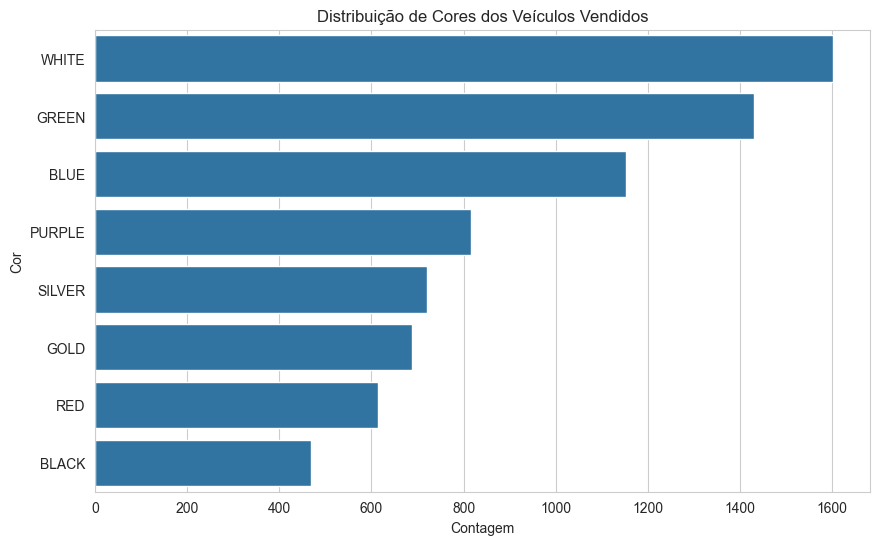


6.2 Marcas e modelos com melhor desempenho (menor tempo de venda) por estado:
    state       makex              make.model  lot.sale.days
59     AZ  OLDSMOBILE     OLDSMOBILE.INTRIGUE       4.000000
14     AZ   CHEVROLET        CHEVROLET.MALIBU      13.555556
20     AZ    CHRYSLER     CHRYSLER.NEW YORKER      19.000000
82     CA    CADILLAC        CADILLAC.SEVILLE       0.000000
95     CA      DAEWOO            DAEWOO.LANOS       1.000000
130    CA  OLDSMOBILE        OLDSMOBILE.ALERO       2.000000
157    FL    CADILLAC  CADILLAC.FLEETWOOD RWD       4.500000
206    FL       OTHER            EAGLE.VISION       8.000000
208    FL       OTHER            INFINITI.J30       9.500000
266    GA      NISSAN           NISSAN.MAXIMA       0.000000
271    GA  OLDSMOBILE        OLDSMOBILE.ALERO       1.000000
264    GA  MITSUBISHI       MITSUBISHI.MIRAGE       1.333333
333    NM       OTHER           SUZUKI.ESTEEM       1.000000
331    NM  OLDSMOBILE     OLDSMOBILE.INTRIGUE       3.000000
341   

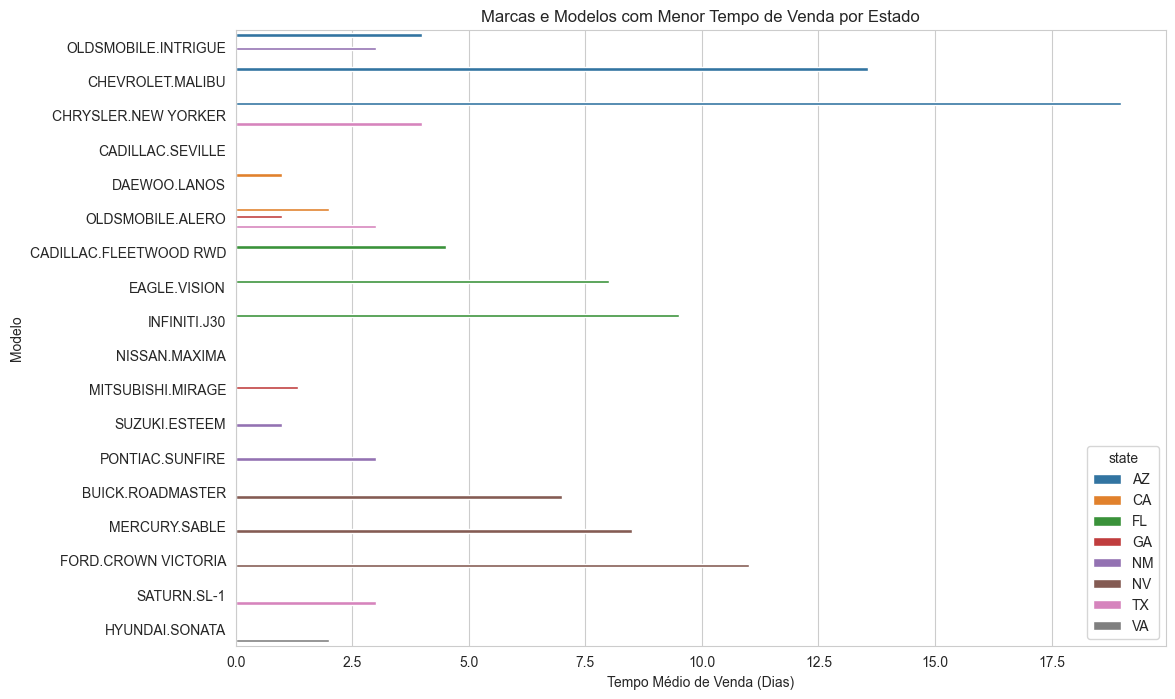

In [7]:
# 6.1 Cor mais popular
color_counts = df['color.set'].value_counts()
print('6.1 Cor mais popular:')
print(color_counts)

# Visualização
sns.barplot(x=color_counts.values, y=color_counts.index)
plt.title('Distribuição de Cores dos Veículos Vendidos')
plt.xlabel('Contagem')
plt.ylabel('Cor')
plt.show()

# 6.2 Marcas e modelos com melhor desempenho por estado
# Considerando desempenho como menor tempo de venda
mean_sale_days_by_make_state = df.groupby(['state', 'makex', 'make.model'])['lot.sale.days'].mean().reset_index()
top_performance_by_state = mean_sale_days_by_make_state.sort_values(['state', 'lot.sale.days']).groupby('state').head(3)
print('\n6.2 Marcas e modelos com melhor desempenho (menor tempo de venda) por estado:')
print(top_performance_by_state)

# Visualização
plt.figure(figsize=(12, 8))
sns.barplot(x='lot.sale.days', y='make.model', hue='state', data=top_performance_by_state)
plt.title('Marcas e Modelos com Menor Tempo de Venda por Estado')
plt.xlabel('Tempo Médio de Venda (Dias)')
plt.ylabel('Modelo')
plt.show()